In [161]:
import pandas as pd
import requests

# Carregue o conteúdo do arquivo CSV diretamente da URL
url = 'https://raw.githubusercontent.com/Borgarelli/IAHourly_energy_demand_generation_weather/main/spotify2023.csv'
response = requests.get(url)

# Verifique se a solicitação foi bem-sucedida
if response.status_code == 200:
    # Decodifique o conteúdo usando uma codificação diferente (por exemplo, 'ISO-8859-1' ou 'latin1')
    decoded_content = response.content.decode('ISO-8859-1')

    # Substitua caracteres problemáticos por caracteres válidos (ou remova-os)
    cleaned_content = decoded_content.replace('ï¿½', '')

    # Crie um objeto StringIO para ler o conteúdo corrigido
    from io import StringIO
    cleaned_file = StringIO(cleaned_content)

    # Carregue o conteúdo corrigido com pandas
    spotify = pd.read_csv(cleaned_file)

    # Continue o seu processamento com o DataFrame 'spotify'
else:
    print("Falha ao obter o arquivo CSV.")

spotify.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [162]:
spotify = spotify.set_index('track_name')


# Especifique as colunas a serem usadas no cálculo da pontuação

colunas_para_calcular = ['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists',
                         'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']

# Crie uma nova coluna chamada 'pontuacao' com a soma das colunas selecionadas
spotify['pontuacao'] = spotify[colunas_para_calcular].sum(axis=1)

# Defina critérios para categorizar as músicas com base na média da pontuação
media_pontuacao = spotify['pontuacao'].mean()
limite_excelente = 1.2 * media_pontuacao
limite_boa = 0.8 * media_pontuacao

# Crie uma função para categorizar as músicas com base na média da pontuação
def categorizar_musica(row):
    if row['pontuacao'] > limite_excelente:
        return 'Excelente'
    elif row['pontuacao'] > limite_boa:
        return 'Boa'
    else:
        return 'Não tão boa'

# Aplique a função para criar uma nova coluna chamada 'categoria'
spotify['categoria'] = spotify.apply(categorizar_musica, axis=1)



# Agora, o DataFrame 'data' incluirá a pontuação total e a categoria de cada música
spotify.head()

<ipython-input-162-1c27733a886f>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  spotify['pontuacao'] = spotify[colunas_para_calcular].sum(axis=1)


,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,pontuacao,categoria
track_name,,,,,,,,,,,,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,...,Major,80,89,83,31,0,8,4,1016,Não tão boa
LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,...,Major,71,61,74,7,0,10,4,1710,Não tão boa
vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,...,Major,51,32,53,17,0,31,6,1825,Não tão boa
Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,...,Major,55,58,72,11,0,11,15,8293,Excelente
WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,...,Minor,65,23,80,14,63,11,6,3415,Não tão boa


In [163]:
spotify.drop(['artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day','bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%','liveness_%', 'speechiness_%'], axis=1, inplace=True)
spotify.head(500)

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,pontuacao,categoria
track_name,,,,,,,,,,
Seven (feat. Latto) (Explicit Ver.),553,147,141381703,43,263,45,10,826,1016,Não tão boa
LALA,1474,48,133716286,48,126,58,14,382,1710,Não tão boa
vampire,1397,113,140003974,94,207,91,14,949,1825,Não tão boa
Cruel Summer,7858,100,800840817,116,207,125,12,548,8293,Excelente
WHERE SHE GOES,3133,50,303236322,84,133,87,15,425,3415,Não tão boa
...,...,...,...,...,...,...,...,...,...,...
Run Rudolph Run - Single Version,8612,0,245350949,120,30,52,0,1,8762,Excelente
Jingle Bells - Remastered 1999,4326,0,178660459,32,3,65,0,0,4361,Boa
Far,680,0,51641685,2,15,1,0,0,697,Não tão boa


In [166]:
# Limpar a coluna 'streams' para conter apenas valores numéricos
spotify['streams'] = spotify['streams'].str.extract('(\d+)').astype(int)

# Remova vírgulas da coluna 'in_deezer_playlists' e depois converta para float
spotify['in_deezer_playlists'] = spotify['in_deezer_playlists'].str.replace(',', '').astype(int)

spotify['in_shazam_charts'] = spotify['in_shazam_charts'].str.replace(',', '').astype(float)


AttributeError: ignored

In [154]:
# Todos os atributos menos as colunas de classe codificadas
X = spotify.drop(['categoria', 'pontuacao'], axis=1)

# Colunas de classe codificadas
y = spotify['categoria']


In [167]:
# Identifique as colunas que ainda contêm valores não numéricos
non_numeric_columns = spotify.select_dtypes(exclude='number').columns

# Exiba as colunas com valores não numéricos
for column in non_numeric_columns:
    problematic_rows = spotify[~spotify[column].apply(lambda x: str(x).isnumeric())]
    if not problematic_rows.empty:
        print(f"Problema encontrado na coluna '{column}':")
        print(problematic_rows)

Problema encontrado na coluna 'in_shazam_charts':
                                                    in_spotify_playlists  \
track_name                                                                 
Flowers                                                            12211   
Daylight                                                            3528   
As It Was                                                          23575   
What Was I Made For? [From The Motion Picture "...                   873   
Popular (with Playboi Carti & Madonna) - The Id...                  1945   
Barbie World (with Aqua) [From Barbie The Album]                    1117   
Another Love                                                       18371   
Blinding Lights                                                    43899   
Heat Waves                                                         22543   
Sweater Weather                                                    16413   
Someone You Loved                     

In [168]:
spotify.dropna(inplace=True)


In [169]:
# Retira 20% para testar
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)

In [170]:
# Treina com 80%
from sklearn.neural_network import MLPClassifier

# Instancia um classificador tipo rede neural com, no máximo, 2000 épocas
model = MLPClassifier(random_state=1, max_iter=2000)

# Treina o modelo
model.fit(X_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

Acurácia: 0.71
Precisão: 0.24
Matriz de Confusão


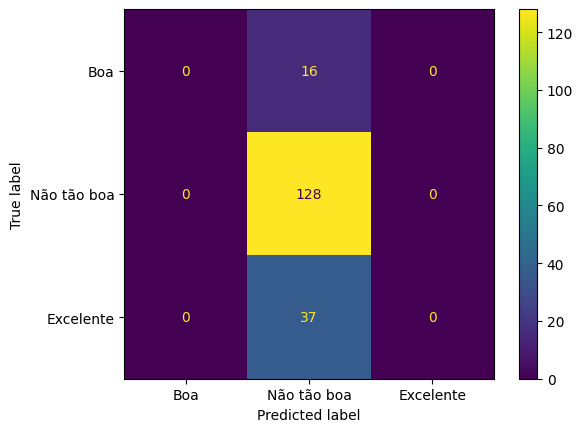

In [171]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))
# Precisão
precision = precision_score(y_test, y_pred, average = 'macro',zero_division = 0.0)
print("Precisão: {:.2f}".format(precision))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()

In [172]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Aplicar oversampling às suas features X e classes y
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Divida os dados em conjuntos de treinamento e teste após o oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1)

# Pré-processamento de dados: Trate valores ausentes e normalize recursos
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instancie um classificador tipo rede neural com ajustes de hiperparâmetros
model = MLPClassifier(
    random_state=1,
    max_iter=1000,
    hidden_layer_sizes=(100, 100),
    learning_rate='adaptive',
    learning_rate_init=0.01,  # Ajustado para um valor menor
    alpha=0.0001,  # Regularização L2
    tol=1e-5,  # Tolerância menor para convergência
    n_iter_no_change=20,  # Maior número de iterações sem melhoria para parar o treinamento
)

# Treine o modelo
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000, n_iter_no_change=20,
              random_state=1, tol=1e-05)

Acurácia: 0.99
Precisão: 0.99
Matriz de Confusão


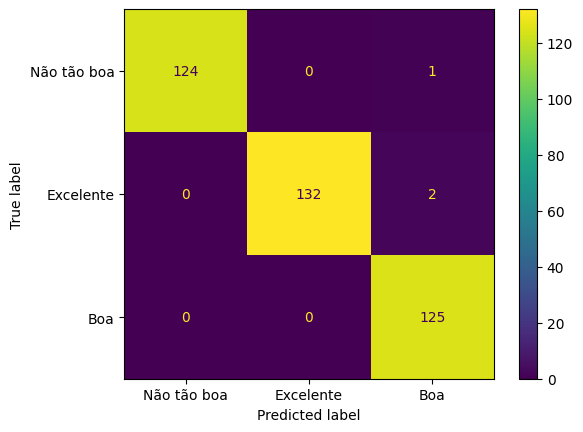

In [173]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Predição
y_pred = model.predict(X_test)

# Acurácia
acc = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(acc))
# Precisão
precision = precision_score(y_test, y_pred, average = 'macro',zero_division = 0.0)
print("Precisão: {:.2f}".format(precision))

# Matriz de confusão
print('Matriz de Confusão')
cm = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_train.unique())
disp.plot()